In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
psych_file_path = "C:/Users/SAPTARSHI/Downloads/behavioral factors.xlsx"  
df_psych = pd.read_excel(psych_file_path)

In [3]:
# Define independent variables (X) and target variable (y)
X_psych = df_psych.drop(columns=["Have you ever crossed the street during a red light?"])
y_psych = df_psych["Have you ever crossed the street during a red light?"]


In [4]:
# Split dataset into training and testing sets
X_train_psych, X_test_psych, y_train_psych, y_test_psych = train_test_split(
    X_psych, y_psych, test_size=0.2, random_state=42
)


In [5]:
# Train logistic regression model
log_reg_psych = LogisticRegression()
log_reg_psych.fit(X_train_psych, y_train_psych)

LogisticRegression()

In [9]:
# Get feature importance (coefficients)
feature_importance = log_reg_psych.coef_[0]

In [10]:
# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({"Feature": X_psych.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

In [11]:
# Print feature importance
print("Feature Importance Ranking:")
print(importance_df)

Feature Importance Ranking:
                                             Feature  Importance
2        How often do you cross during a red light ?    1.619962
1         How many hours a day do you usually drive?    0.186989
0  How do you react when you see someone running ...   -2.032925


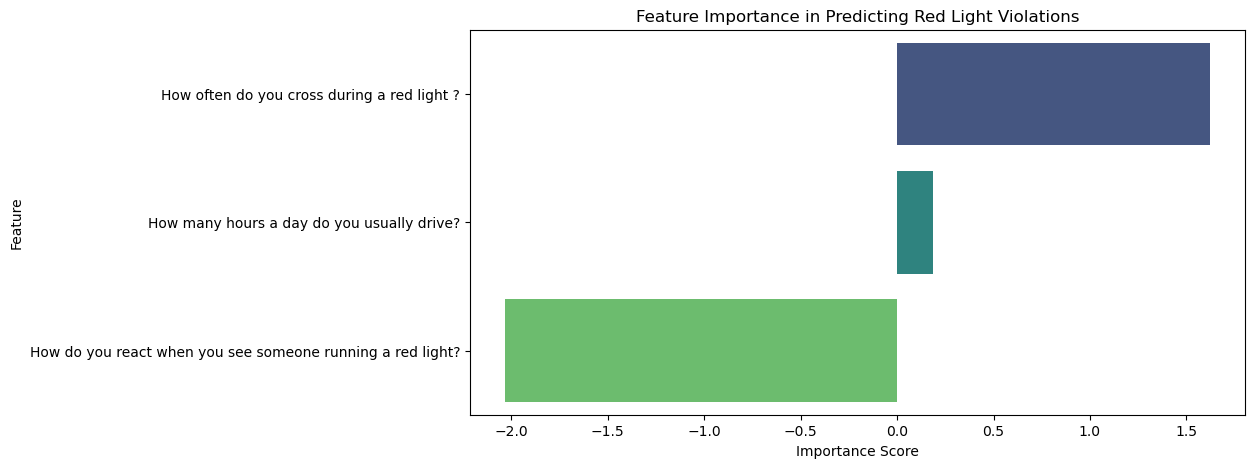

In [15]:
# Visualization of feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Red Light Violations")
plt.show()

In [12]:
# Get feature importance (coefficients) and calculate odds ratios
coefficients_psych = log_reg_psych.coef_[0]
odds_ratios_psych = np.exp(coefficients_psych)

In [13]:
# Create a DataFrame to display feature importance and odds ratios
importance_df_psych = pd.DataFrame(
    {"Feature": X_psych.columns, "Coefficient": coefficients_psych, "Odds_Ratio": odds_ratios_psych}
).sort_values(by="Odds_Ratio", ascending=False)


In [14]:
# Print feature importance and odds ratios
print("Feature Importance and Odds Ratios:")
print(importance_df_psych)


Feature Importance and Odds Ratios:
                                             Feature  Coefficient  Odds_Ratio
2        How often do you cross during a red light ?     1.619962    5.052899
1         How many hours a day do you usually drive?     0.186989    1.205614
0  How do you react when you see someone running ...    -2.032925    0.130952


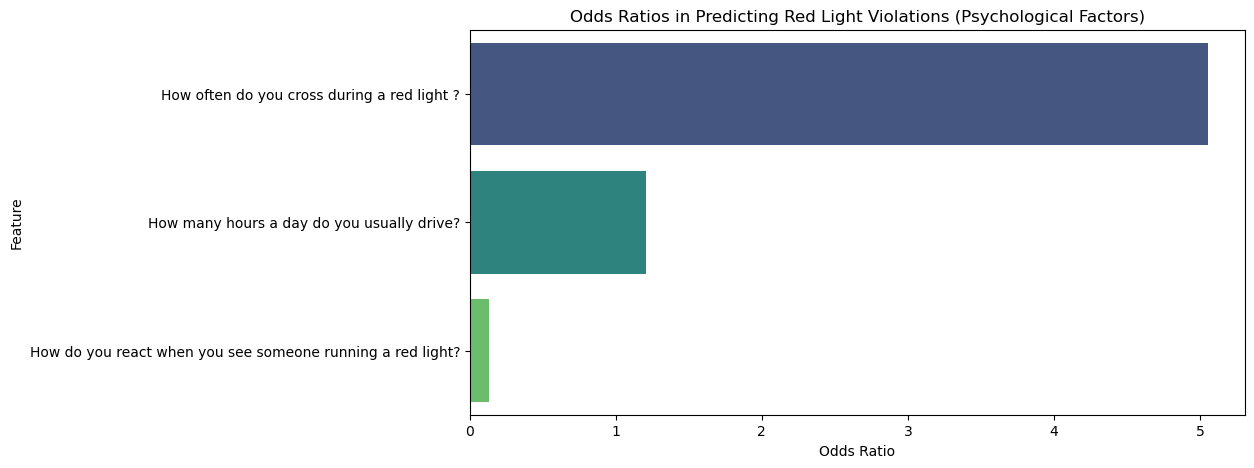

In [16]:
# Visualization of odds ratios
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df_psych["Odds_Ratio"], y=importance_df_psych["Feature"], palette="viridis")
plt.xlabel("Odds Ratio")
plt.ylabel("Feature")
plt.title("Odds Ratios in Predicting Red Light Violations (Psychological Factors)")
plt.show()